# 191180055 - Ali Mert KOCAMAN

## Homework - 3

## Decision Tree for Iris dataset.

In [46]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pickle
from sklearn.pipeline import Pipeline
%matplotlib inline

In [47]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
# INFORMATION GAIN
"""
To express the information gain very simply, it is between 0 and 1, it is the inverse of the entropy and shows how much value 
can be gained from the classification results given for a given feature.
"""

'\nTo express the information gain very simply, it is between 0 and 1, it is the inverse of the entropy and shows how much value \ncan be gained from the classification results given for a given feature.\n'

In [49]:
iris.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [50]:
# We split our data.

A = iris[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm',]].values
B = iris['Species'].values

train_A, test_A, train_B, test_B = train_test_split(A, B, random_state = 123, test_size = 0.25)


[Text(167.40000000000003, 199.32, 'X[1] <= 0.8\ngini = 0.664\nsamples = 112\nvalue = [34, 42, 36]'),
 Text(133.92000000000002, 163.07999999999998, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(200.88000000000002, 163.07999999999998, 'X[1] <= 1.75\ngini = 0.497\nsamples = 78\nvalue = [0, 42, 36]'),
 Text(133.92000000000002, 126.83999999999999, 'X[0] <= 5.35\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(100.44000000000001, 90.6, 'X[2] <= 4.95\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]'),
 Text(66.96000000000001, 54.359999999999985, 'X[1] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(33.480000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(167.40000000000003, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.84000000

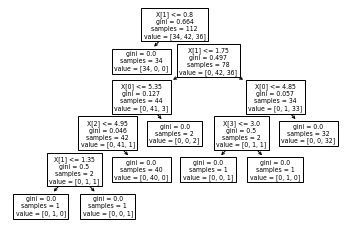

In [51]:
# Let's start with the Gini index.
# The Gini index is a measure of inequality. It can be used to measure any unequal distribution.

classifier1 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2)
classifier1 = classifier1.fit(train_A, train_B)  

tree.plot_tree(classifier1)

In [52]:
classifier1.predict(train_A)

# These are our predictions for Train A.

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iri

In [53]:
#PRECISION
"""
Precision shows how many of the values we estimated as Positive are actually Positive.

The precision value is especially important when the cost of False Positive estimation is high.
"""
#ACCURACY
"""
Accuracy is a metric that is widely used to measure the success of a model but does not appear to be sufficient on its own. 
Accuracy value is calculated by the ratio of the areas we predict correctly in the model to the total data set.
"""

#F-1 SCORE
"""
F1 Score value shows us the harmonic mean of Precision and Recall values.
"""

#RECALL
"""
Recall is a metric that shows how much of the operations we need to estimate as Positive, we estimate as Positive.

The sensitivity value is also a metric that will help us in situations where the cost of estimating as False Negative is high.
"""


print(classification_report(test_B, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       0.36      0.25      0.30        16
Iris-versicolor       0.20      0.38      0.26         8
 Iris-virginica       0.33      0.29      0.31        14

       accuracy                           0.29        38
      macro avg       0.30      0.30      0.29        38
   weighted avg       0.32      0.29      0.29        38



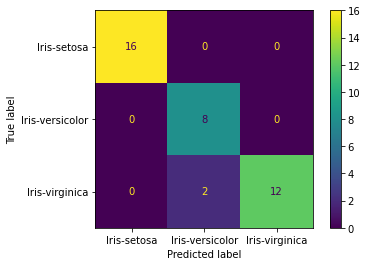

In [54]:
#CONFUSION MATRIX
"""
A confusion matrix is a table often used to describe the performance of a classification model on a set of test data for which 
the actual values are known.
"""

plot_confusion_matrix(classifier1, test_A, test_B)

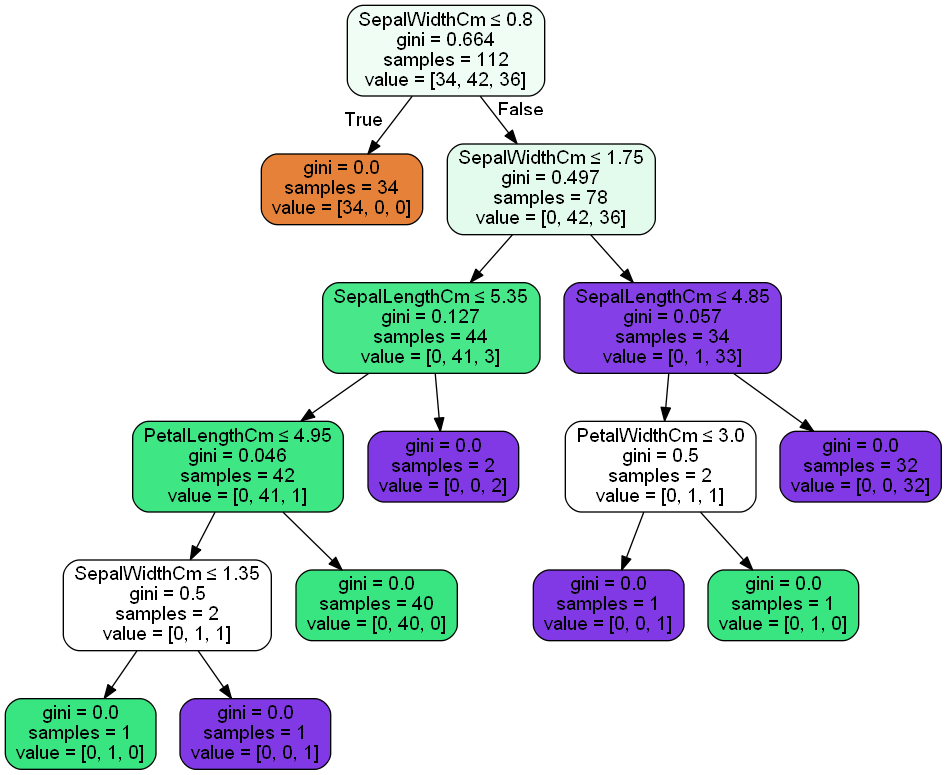

In [55]:
# Visualization of the Tree
dot_data = StringIO()
export_graphviz(classifier1, out_file=dot_data, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[Text(167.40000000000003, 199.32, 'X[0] <= 2.45\nentropy = 1.579\nsamples = 112\nvalue = [34, 42, 36]'),
 Text(133.92000000000002, 163.07999999999998, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(200.88000000000002, 163.07999999999998, 'X[1] <= 1.75\nentropy = 0.996\nsamples = 78\nvalue = [0, 42, 36]'),
 Text(133.92000000000002, 126.83999999999999, 'X[0] <= 5.35\nentropy = 0.359\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(100.44000000000001, 90.6, 'X[2] <= 4.95\nentropy = 0.162\nsamples = 42\nvalue = [0, 41, 1]'),
 Text(66.96000000000001, 54.359999999999985, 'X[0] <= 3.9\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(33.480000000000004, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(100.44000000000001, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 54.359999999999985, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(167.40000000000003, 90.6, 'entropy = 0.0\nsamples = 2\nvalue = [

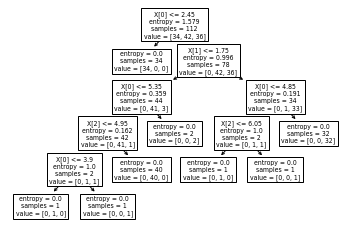

In [56]:
# Let's continue with the entropy.
# Entropy is a term that expresses the disorder of a system.

classifier2 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
classifier2 = classifier2.fit(train_A, train_B)  

tree.plot_tree(classifier2)

In [57]:
classifier2.predict(test_A)

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [58]:
# evaluation for multi class classification
print(classification_report(test_B, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       0.36      0.25      0.30        16
Iris-versicolor       0.20      0.38      0.26         8
 Iris-virginica       0.33      0.29      0.31        14

       accuracy                           0.29        38
      macro avg       0.30      0.30      0.29        38
   weighted avg       0.32      0.29      0.29        38



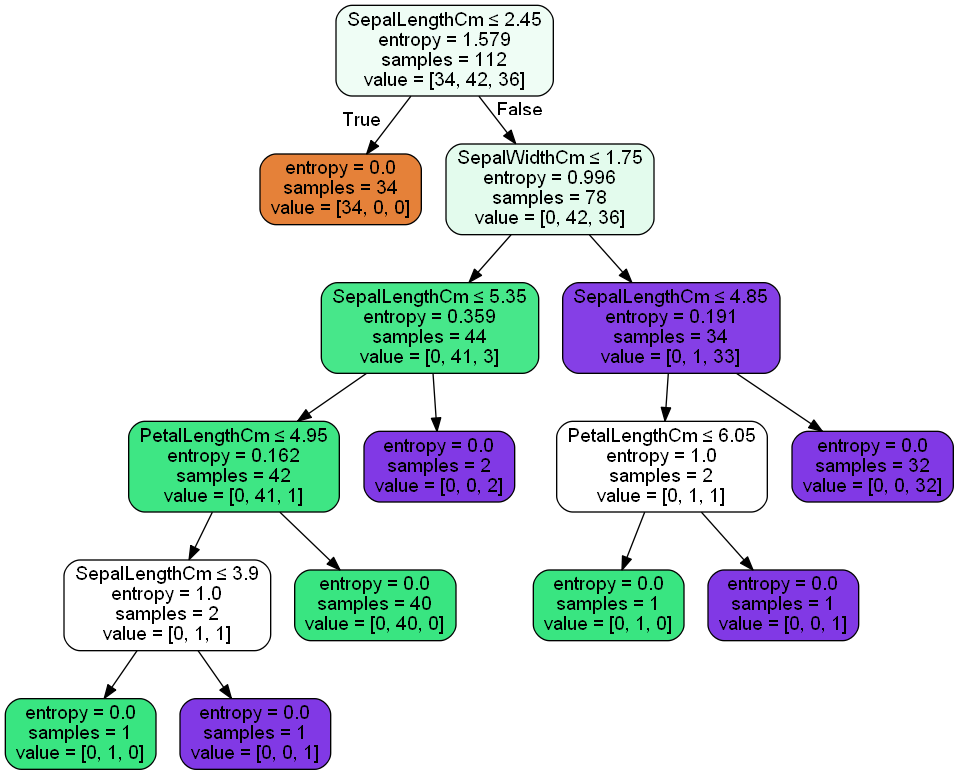

In [59]:
# Visualization of the Tree
dot_data = StringIO()
export_graphviz(classifier2, out_file=dot_data, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

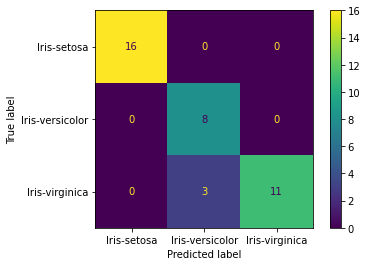

In [60]:
#Confusion matrix of the classifier
plot_confusion_matrix(classifier2, test_A, test_B)